<a href="https://colab.research.google.com/github/ajrianop/Models/blob/main/2_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

We know that in general, the behaviour of the data is not always linear, we can see different trends in the different phenomenum around the world. So we have to take in mind other methods than linear regression. In this case we are going to talk about polynomial regression.
A linear regression is given as the following equation:
$$y=mx+b.$$
So, polynomial regression has the polynomial shape with different degrees and can be seen as:
$$y=a_nx^n+a_{n-1}x^{n-1}+\cdots+a_1x+a_0.$$
With even more large degrees, we produce more complex curves.
To take into account:
1. We should use the properly degreee in order to not obtain overfitting.
2. Not always a good R^2 implies a good predictor, it only says that our training data fit well with the curve, this does not imply that the sample data fits good.


In [ ]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt #To plot
from sklearn.metrics import r2_score #To find the R^2 error

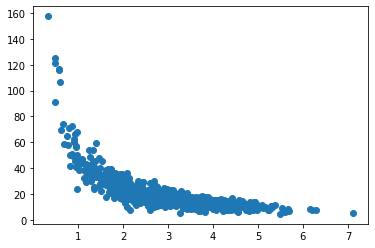

In [ ]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 500)
purchaseAmount = np.random.normal(50.0, 10.0, 500) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

We are going to work with numpy

In [ ]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)
'''
The following line allows us to describe a polynomial regression, which can be
modified according to the DATA in the function functionPolReg(DATA)
'''
functionPolReg = np.poly1d(np.polyfit(x, y, 4))
# We can see the coefficients of the polynomial regression 
print(functionPolReg)

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


The coefficients are given as an array and they are ordered according to degree, so if we want to find the coefficient of the 2nd degree term, we write `functionPolReg[2]`, let see the following:

In [ ]:
functionPolReg

poly1d([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

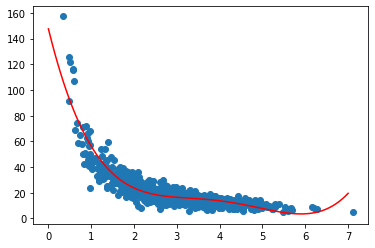

In [ ]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, functionPolReg(xp), c='r')
plt.show()

We use sklearn library in order to find the $R^2$ error

In [ ]:
r2 = r2_score(y, functionPolReg(x))
r2

0.8293766396303073

## **Polynomial regression with different degrees**

We are going to create a function which allow us to create different plots, using polynomial regression with different degrees.

In [ ]:
def PlotPolynomialRegression(n):
  for i in range(1,n+1):
    nFunctionPolReg = np.poly1d(np.polyfit(x, y, i))
    partition=np.linspace(0,7,100)
    r2 = r2_score(y, nFunctionPolReg(x))
    plt.scatter(x,y)
    plt.plot(partition, nFunctionPolReg(partition), color= 'red')
    plt.title('Polynomial regression of degree '+ str(i)+ '\nwith R^2 of ' + str(r2) )
    print('The polynomial associated to the dataset is:\n y=')
    print(nFunctionPolReg)
    print('\n')
    plt.show()

Let us plot five polynomial regression with different degrees and see how is the behaviour of the $R^2$ error.

The polynomial associated to the dataset is:
 y=
 
-9.043 x + 46.69




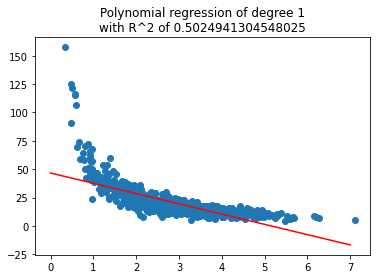

The polynomial associated to the dataset is:
 y=
       2
3.733 x - 31.79 x + 77.53




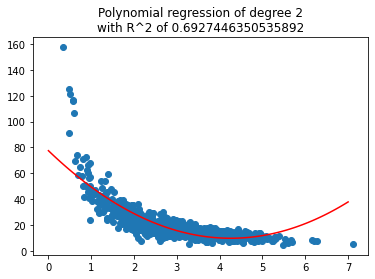

The polynomial associated to the dataset is:
 y=
        3         2
-1.447 x + 17.79 x - 72.46 x + 111.3




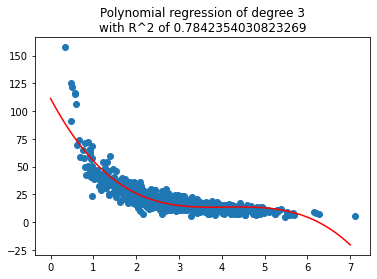

The polynomial associated to the dataset is:
 y=
        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6




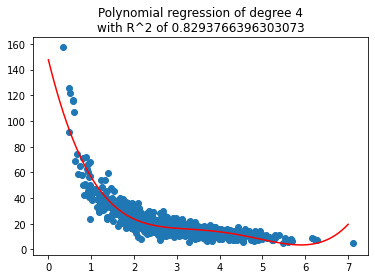

The polynomial associated to the dataset is:
 y=
         5         4        3         2
-0.2342 x + 4.696 x - 35.9 x + 131.6 x - 237.4 x + 191.5




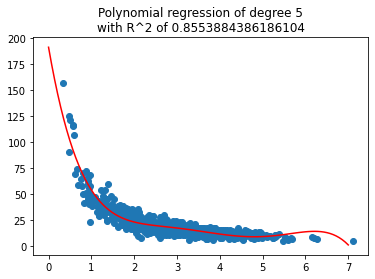

In [ ]:
PlotPolynomialRegression(5)

**Conclusion:** Look that the $R^2$ is even better when the degree increase, we need to take care with this score improving because we can lead to overfitting.